<a href="https://colab.research.google.com/github/Praneethamurala1214/AICTE/blob/main/Project_1_Proposal_Level_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os, re, glob, math
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from IPython.display import display




In [ ]:
from google.colab import files
uploaded = files.upload()

Saving retail_sales_dataset.csv to retail_sales_dataset.csv


In [ ]:
import pandas as pd
import numpy as np
import re
file_path = "retail_sales_dataset.csv"
df = pd.read_csv(file_path)
print("Initial shape:", df.shape)
print("Initial columns:", df.columns.tolist())
def clean_column_names(cols):
    return [re.sub(r'\W+', '_', col.strip().lower()) for col in cols]

df.columns = clean_column_names(df.columns)
print("\nCleaned columns:", df.columns.tolist())
date_candidates = [c for c in df.columns if "date" in c]
if date_candidates:
    date_col = date_candidates[0]
    df[date_col] = pd.to_datetime(df[date_col], errors="coerce")
    print(f"Parsed date column: {date_col}")
else:
    print("No date column found!")
numeric_cols = ["quantity", "price", "total"]
for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")
print("\nMissing values before cleaning:")
print(df.isna().sum())
if date_candidates:
    df = df[df[date_col].notna()]
if "product" in df.columns:
    df = df[df["product"].notna()]
for col in numeric_cols:
    if col in df.columns:
        df[col] = df[col].fillna(0)


before = df.shape[0]
df.drop_duplicates(inplace=True)
after = df.shape[0]
print(f"\nRemoved {before - after} duplicate rows.")
print("\nFinal shape:", df.shape)
print(df.head())


Initial shape: (1000, 9)
Initial columns: ['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age', 'Product Category', 'Quantity', 'Price per Unit', 'Total Amount']

Cleaned columns: ['transaction_id', 'date', 'customer_id', 'gender', 'age', 'product_category', 'quantity', 'price_per_unit', 'total_amount']
Parsed date column: date

Missing values before cleaning:
transaction_id      0
date                0
customer_id         0
gender              0
age                 0
product_category    0
quantity            0
price_per_unit      0
total_amount        0
dtype: int64

Removed 0 duplicate rows.

Final shape: (1000, 9)
   transaction_id       date customer_id  gender  age product_category  quantity  price_per_unit  total_amount
0               1 2023-11-24     CUST001    Male   34           Beauty         3              50           150
1               2 2023-02-27     CUST002  Female   26         Clothing         2             500          1000
2               3 2023-01-13     CUST

In [ ]:
import pandas as pd

numeric_cols = ["quantity", "price", "total"]
numeric_cols = [col for col in numeric_cols if col in df.columns]

print("=== Descriptive Statistics ===")
for col in numeric_cols:
    print(f"\nColumn: {col}")
    print(f"Mean   : {df[col].mean():.2f}")
    print(f"Median : {df[col].median():.2f}")
    print(f"Mode   : {df[col].mode().iloc[0]:.2f}" if not df[col].mode().empty else "Mode: N/A")
    print(f"Std Dev: {df[col].std():.2f}")


print("\n=== Pandas describe() output ===")
print(df[numeric_cols].describe())


=== Descriptive Statistics ===

Column: quantity
Mean   : 2.51
Median : 3.00
Mode   : 4.00
Std Dev: 1.13

=== Pandas describe() output ===
          quantity
count  1000.000000
mean      2.514000
std       1.132734
min       1.000000
25%       1.000000
50%       3.000000
75%       4.000000
max       4.000000


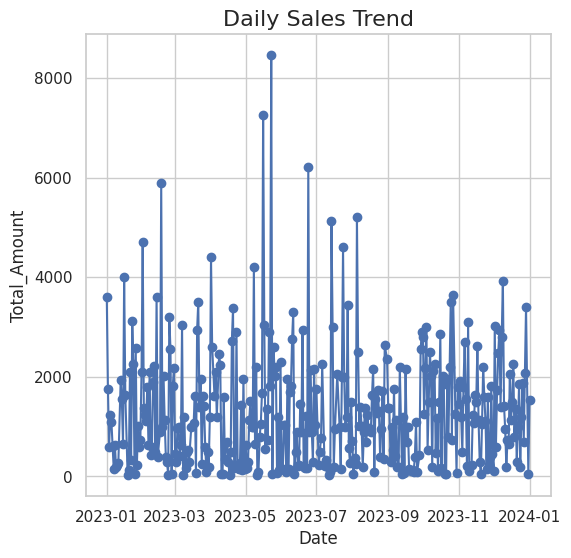

/tmp/ipython-input-3251571711.py:24: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = daily_sales.resample("M").sum()


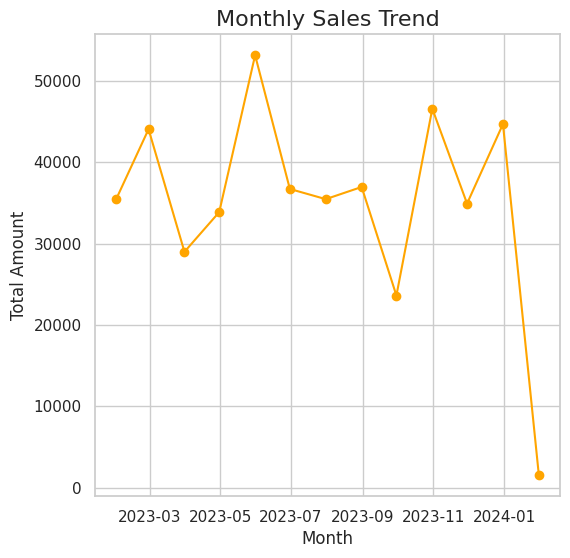

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

if "date" in df.columns:
    df["date"] = pd.to_datetime(df["date"], errors="coerce")
else:
    raise ValueError("No 'date' column found in the dataset.")


df = df.sort_values(by="date")



daily_sales = df.groupby("date")["total_amount"].sum()
plt.figure(figsize=(6, 6))
plt.plot(daily_sales.index, daily_sales.values, marker='o', linestyle='-')
plt.title("Daily Sales Trend", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Total_Amount", fontsize=12)
plt.grid(True)
plt.show()


monthly_sales = daily_sales.resample("M").sum()

plt.figure(figsize=(6, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', color='orange')
plt.title("Monthly Sales Trend", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Total Amount", fontsize=12)
plt.grid(True)
plt.show()

Column Names: ['transaction_id', 'date', 'customer_id', 'gender', 'age', 'product_category', 'quantity', 'price_per_unit', 'total_amount']


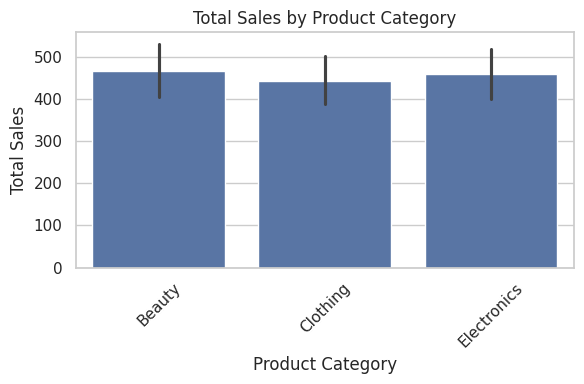

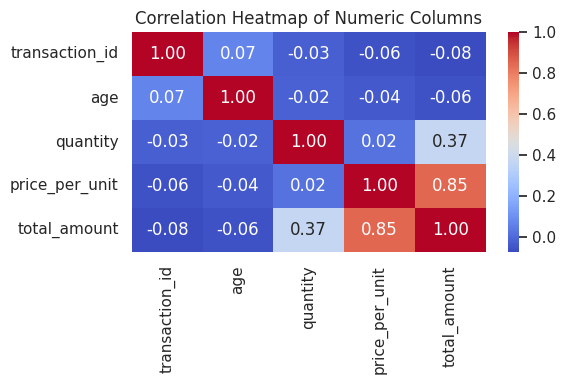

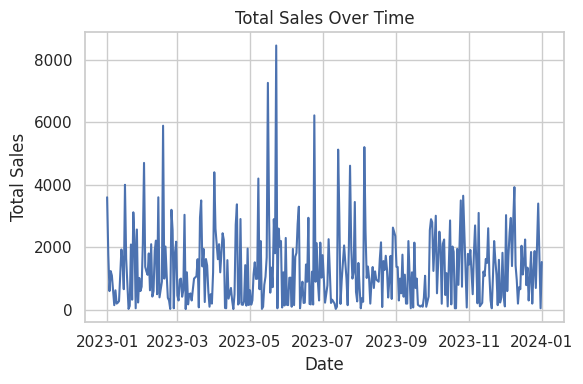

In [ ]:
retail_df = pd.read_csv('retail_sales_dataset.csv')

retail_df.columns = retail_df.columns.str.strip().str.lower().str.replace(' ', '_')

print("Column Names:", retail_df.columns.tolist())

plt.figure(figsize=(6, 4))
sns.barplot(
    data=retail_df,
    x='product_category',
    y='total_amount'
)
plt.xlabel("Product Category")
plt.ylabel("Total Sales")
plt.title("Total Sales by Product Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
corr_matrix = retail_df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap of Numeric Columns")
plt.tight_layout()
plt.show()

if 'date' in retail_df.columns:
    retail_df['date'] = pd.to_datetime(retail_df['date'])

    sales_over_time = retail_df.groupby('date')['total_amount'].sum().reset_index()

    plt.figure(figsize=(6, 4))
    sns.lineplot(
        data=sales_over_time,
        x='date',
        y='total_amount'
    )
    plt.xlabel("Date")
    plt.ylabel("Total Sales")
    plt.title("Total Sales Over Time")
    plt.tight_layout()
    plt.show()
else:
    print("Column 'date' not found in the dataset. Cannot create line graph.")

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving menu.csv to menu.csv


In [ ]:

import pandas as pd


df = pd.read_csv("menu.csv")
print("First 5 rows of the dataset:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nMissing values per column:")
print(df.isnull().sum())
df.drop_duplicates(inplace=True)
for col in df.columns:
    if df[col].dtype == "object":
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].mean(), inplace=True)
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'], errors='coerce')
print("\nCleaned dataset shape:", df.shape)
print(df.head())


First 5 rows of the dataset:
    Category                              Item    Serving Size  Calories  Calories from Fat  Total Fat  Total Fat (% Daily Value)  Saturated Fat  Saturated Fat (% Daily Value)  \
0  Breakfast                      Egg McMuffin  4.8 oz (136 g)       300                120       13.0                         20            5.0                             25   
1  Breakfast                 Egg White Delight  4.8 oz (135 g)       250                 70        8.0                         12            3.0                             15   
2  Breakfast                  Sausage McMuffin  3.9 oz (111 g)       370                200       23.0                         35            8.0                             42   
3  Breakfast         Sausage McMuffin with Egg  5.7 oz (161 g)       450                250       28.0                         43           10.0                             52   
4  Breakfast  Sausage McMuffin with Egg Whites  5.7 oz (161 g)       400    

/tmp/ipython-input-2403947756.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
/tmp/ipython-input-2403947756.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

In [ ]:

mean_values = df.mean(numeric_only=True)
print("\nMean values:")
print(mean_values)

median_values = df.median(numeric_only=True)
print("\nMedian values:")
print(median_values)

mode_values = df.mode(numeric_only=True).iloc[0]
print("\nMode values:")
print(mode_values)

std_values = df.std(numeric_only=True)
print("\nStandard Deviation values:")
print(std_values)

summary_stats = df.describe()
print("\nSummary Statistics:")
print(summary_stats)



Mean values:
Calories                         368.269231
Calories from Fat                127.096154
Total Fat                         14.165385
Total Fat (% Daily Value)         21.815385
Saturated Fat                      6.007692
Saturated Fat (% Daily Value)     29.965385
Trans Fat                          0.203846
Cholesterol                       54.942308
Cholesterol (% Daily Value)       18.392308
Sodium                           495.750000
Sodium (% Daily Value)            20.676923
Carbohydrates                     47.346154
Carbohydrates (% Daily Value)     15.780769
Dietary Fiber                      1.630769
Dietary Fiber (% Daily Value)      6.530769
Sugars                            29.423077
Protein                           13.338462
Vitamin A (% Daily Value)         13.426923
Vitamin C (% Daily Value)          8.534615
Calcium (% Daily Value)           20.973077
Iron (% Daily Value)               7.734615
dtype: float64

Median values:
Calories                       

/tmp/ipython-input-2813836031.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
/tmp/ipython-input-2813836031.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


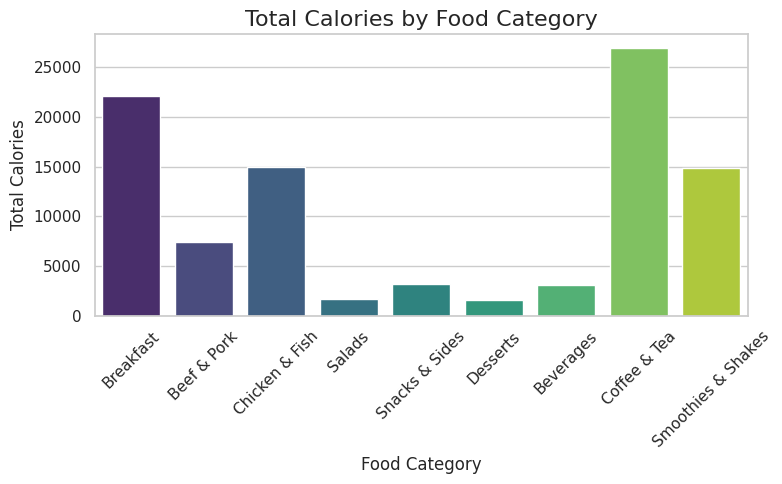

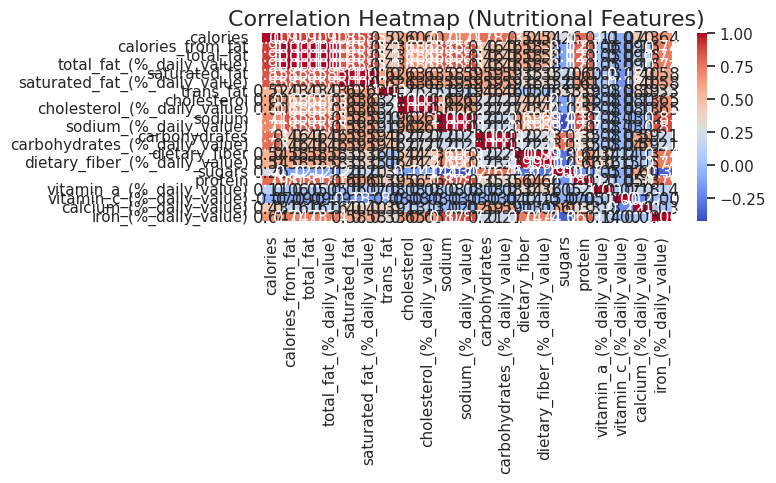

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

menu = pd.read_csv("menu.csv")
menu.columns = menu.columns.str.strip().str.lower().str.replace(' ', '_')
menu.drop_duplicates(inplace=True)
menu.dropna(inplace=True)

if 'category' in menu.columns:
    plt.figure(figsize=(8, 5))
    sns.barplot(
        data=menu,
        x='category',
        y='calories',
        estimator=sum,
        ci=None,
        palette='viridis'
    )
    plt.title("Total Calories by Food Category", fontsize=16)
    plt.xlabel("Food Category", fontsize=12)
    plt.ylabel("Total Calories", fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("No 'category' column found. Skipping bar plot.")

plt.figure(figsize=(8, 5))
sns.heatmap(
    menu.select_dtypes(include='number').corr(),
    annot=True,
    cmap='coolwarm',
    fmt=".2f"
)
plt.title("Correlation Heatmap (Nutritional Features)", fontsize=16)
plt.tight_layout()
plt.show()
